<a href="https://colab.research.google.com/github/AhmadZahran1011/AhmadZahran_2411532004_ML2526/blob/main/Praktikum1/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = "/content/drive/MyDrive/ML/advertising.csv"
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
print(df.head())

print("\nDescriptive stats:")
(df.describe().T)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (200, 4)
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Descriptive stats:


,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


<Figure size 640x480 with 0 Axes>

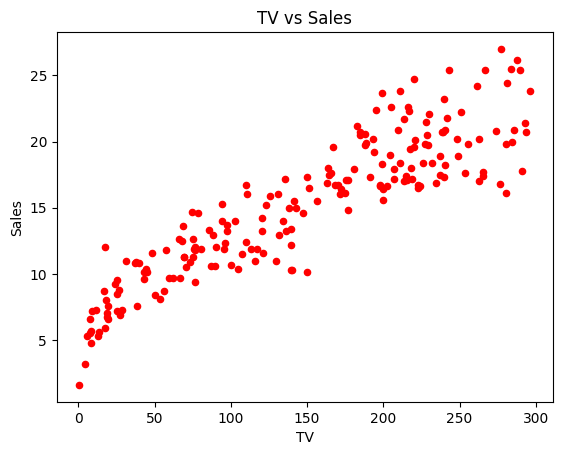

In [41]:
plt.figure()
df.plot(kind='scatter', x='TV', y='Sales', color='red')
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [27]:
X = df[["TV"]]
y = df[["Sales"]]

reg_model = LinearRegression().fit(X, y)

print("Simple Linear Regression (Sales ~ TV)")
print("Intercept (b0):", reg_model.intercept_[0])
print("Coefficient TV (b1):", reg_model.coef_[0][0])

Simple Linear Regression (Sales ~ TV)
Intercept (b0): 6.974821488229891
Coefficient TV (b1): 0.055464770469558874


In [39]:
tv_150 = reg_model.intercept_[0] + reg_model.coef_[0][0] * 150
tv_150_reg = reg_model.predict([[150]])
tv_500 = reg_model.intercept_[0] + reg_model.coef_[0][0] * 500

print("Prediksi Sales jika TV=150:", tv_150)
print("Prediksi", tv_150_reg)
print("Prediksi Sales jika TV=500:", tv_500)

Prediksi Sales jika TV=150: 15.294537058663721
Prediksi [[15.29453706]]
Prediksi Sales jika TV=500: 34.70720672300933


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


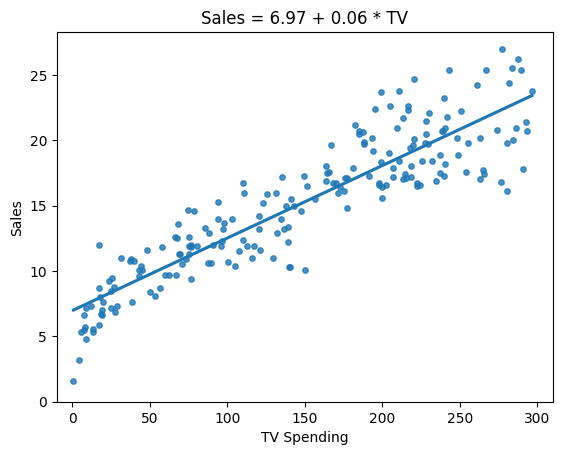

In [43]:
plt.figure()
sns.regplot(x=X, y=y, scatter_kws={'s': 15}, ci=False)
plt.title(f"Sales = {reg_model.intercept_[0]:.2f} + {reg_model.coef_[0][0]:.2f} * TV")
plt.xlabel("TV Spending")
plt.ylabel("Sales")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

# Pisahkan variabel dependen dengan variabel independen, variabel independent yang digunakan adalah TV, Radio, dan Newspaper.

In [ ]:
X_multi = df.drop("Sales", axis=1)
y_multi = df[["Sales"]]

# Bagi dataset menjadi data latih (70%) dan data uji (30%).

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=1)
print("Shape Data Latih:", X_train.shape, y_train.shape)
print("Shape Data Uji:", X_test.shape, y_test.shape)

Shape Data Latih: (140, 3) (140, 1)
Shape Data Uji: (60, 3) (60, 1)


# Latih model regresi linier menggunakan semua fitur di data training, kemudian tampilkan nilai intercept dan slope variablenya

In [47]:
reg_model_multi = LinearRegression().fit(X_train, y_train)

print("\n=== Multiple Linear Regression (Train/Test Split) ===")
print("Intercept:", reg_model_multi.intercept_)
print("Coefficients [TV, Radio, Newspaper]:", reg_model_multi.coef_)


=== Multiple Linear Regression (Train/Test Split) ===
Intercept: [4.66143972]
Coefficients [TV, Radio, Newspaper]: [[ 0.05502392  0.10251003 -0.00150711]]


## Lakukan prediksi sales untuk TV=30, Radio=10, dan Newspaper=40

In [48]:
new_data = pd.DataFrame([[30, 10, 40]], columns=["TV", "Radio", "Newspaper"])
pred_new = reg_model_multi.predict(new_data)[0][0]
print(f"Prediksi Sales untuk (TV=30, Radio=10, Newspaper=40):", pred_new)

Prediksi Sales untuk (TV=30, Radio=10, Newspaper=40): 7.276973308377115


# Evaluasi model yang telah dilatih menggunakan data testing dengan menghitung RMSE dan R2

In [50]:
y_pred_train = reg_model_multi.predict(X_train)
y_pred_test = reg_model_multi.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train = reg_model_multi.score(X_train, y_train)
r2_test = reg_model_multi.score(X_test, y_test)

print("RMSE Train:", rmse_train)
print("RMSE Test :", rmse_test)
print("R^2 Train :", r2_train)
print("R^2 Test  :", r2_test)

RMSE Train: 1.6929025956077548
RMSE Test : 1.5396947656031237
R^2 Train : 0.899374584012456
R^2 Test  : 0.9071151423684273
